# Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the data
url='http://bit.ly/w-data'
df=pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#to see the statical distribution of data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
#to see the shape of data
df.shape

(25, 2)

In [5]:
#if any missing values in data
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Text(0, 0.5, 'Scores')

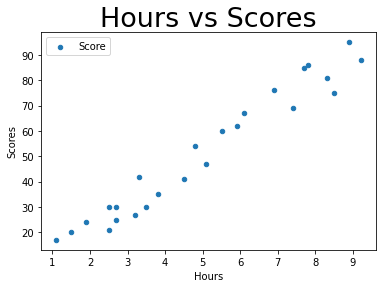

In [6]:
#To visualize the data to see relation between hours vs scores
df.plot(kind='scatter',x='Hours',y='Scores',label='Score')
plt.title('Hours vs Scores',fontsize=27)
plt.xlabel('Hours')
plt.legend()
plt.ylabel('Scores')

# Modelling

In [7]:
#we split the data into train and test data
X=df.drop('Scores',axis=1)
y=df['Scores']

In [8]:
#we splitting train data and test data is 80:20  respectively
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [9]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [10]:
#fit the model into data
lr.fit(X_train,y_train)

LinearRegression()

In [11]:
#predict the varible
pred=lr.predict(X_test)

In [12]:
#After training the model we need to comparing the scores on training_data and testing_data
from sklearn import metrics
print( 'Mean Absolute error for testing data is: ',metrics.mean_absolute_error(y_test,pred))
print('Mean accuracy score on testing data: ',lr.score(X_test,y_test))
print('Mean accuracy score on training data: ',lr.score(X_train,y_train))

Mean Absolute error for testing data is:  6.5712299446927265
Mean accuracy score on testing data:  0.9228044891086011
Mean accuracy score on training data:  0.9601694261082546


In [13]:
print("Mean Absolute Error",metrics.mean_absolute_error(y_test,pred))
print("Mean Square Error",metrics.mean_squared_error(y_test,pred))
print('r2 score:',metrics.r2_score(y_test,pred))
print("Root Mean Squared Error",np.sqrt(metrics.mean_squared_error(y_test,pred)))

Mean Absolute Error 6.5712299446927265
Mean Square Error 50.38087822816252
r2 score: 0.9228044891086011
Root Mean Squared Error 7.097948874721663


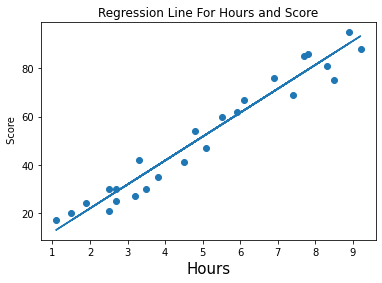

In [14]:
#lets visualize output of the data
line = lr.coef_*X+lr.intercept_
plt.scatter(X,y)
plt.plot(X, line);
plt.title("Regression Line For Hours and Score")
plt.xlabel("Hours",fontsize=15)
plt.ylabel(" Score",fontsize=10)
plt.show()

In [15]:
#compare predicted actial and test results
df_pred=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df_pred

,Actual,Predicted
3,75,86.468742
13,42,34.871646
12,41,46.778668
15,95,90.437749
9,25,28.918135


In [16]:
#check the given result predicted score if a student study for 9.25 hrs in a day
test = 9.25
print("Number of hours studied by student :",test)
print("Predicted value of score student will have secured :",lr.predict(np.array(test).reshape(1, -1))[0])

Number of hours studied by student : 9.25
Predicted value of score student will have secured : 93.91063081111625
